In [3]:
import pandas as pd
df = pd.read_csv('Dataset/Housing.csv')
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [5]:
print(df.isnull().sum())
df.fillna(df.select_dtypes(include = 'number').mean(), inplace = True)
print(df.head())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2            

In [9]:
def yes_or_no(value):
    return 1 if value == "yes" else 0
df['mainroad'] = df['mainroad'].apply(yes_or_no)
df['guestroom'] = df['guestroom'].apply(yes_or_no)
df['basement'] = df['basement'].apply(yes_or_no)
df['hotwaterheating'] = df['hotwaterheating'].apply(yes_or_no)
df['airconditioning'] = df['airconditioning'].apply(yes_or_no)
df['prefarea'] = df['prefarea'].apply(yes_or_no)
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         0          0   
1  12250000  8960         4          4        4         0          0   
2  12250000  9960         3          2        2         0          0   
3  12215000  7500         4          2        2         0          0   
4  11410000  7420         4          1        2         0          0   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                0        2         0   
1         0                0                0        3         0   
2         0                0                0        2         0   
3         0                0                0        3         0   
4         0                0                0        2         0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished  


In [10]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['furnishingstatus'] = lb.fit_transform(df['furnishingstatus'])

In [11]:
x = df.drop(columns = ['price'])
y = df['price']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
y_predict = model.predict(x_test)

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_predict)
mbe = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print('Mean Squared Error', mse)
print('Mean Absolute Error', mbe)
print('R2 Score', r2)

Mean Squared Error 2240240375247.1084
Mean Absolute Error 1118418.6664664845
R2 Score 0.5567891500052821


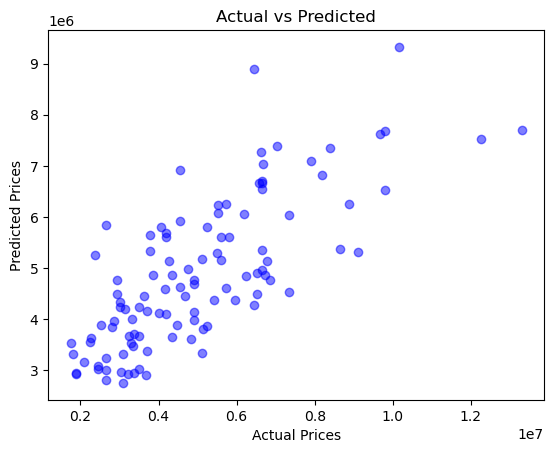

In [18]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, color = 'blue', alpha = 0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted')
plt.show()

In [19]:
print("\nActual vs Predicted Prices:")
for actual, predicted in zip(y_test.values[:10], y_predict[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}")


Actual vs Predicted Prices:
Actual: 4060000, Predicted: 5799987.902740486
Actual: 6650000, Predicted: 6693519.195637364
Actual: 3710000, Predicted: 3380695.075252646
Actual: 6440000, Predicted: 4277429.532203412
Actual: 2800000, Predicted: 3848955.8582167686
Actual: 4900000, Predicted: 3986321.310238172
Actual: 5250000, Predicted: 5809548.536435256
Actual: 4543000, Predicted: 5923791.429461358
Actual: 2450000, Predicted: 3089011.835864656
Actual: 3353000, Predicted: 3470203.727346814


In [20]:
print(f"Model Accuracy (R2 Score): {r2 * 100:.2f}%")

Model Accuracy (R2 Score): 55.68%
